# Text processing

This notebooks shows the exploration of two free text questions. These questions appear when someone joins the <a href="https://www.meetup.com/pt-BR/Data-Visualization-Lisboa/" target="_blank">Data Visualization Lisboa</a> meetup and are the following:

1. What's your connection/interest in data visualisation?
2. What would you like to learn/get to know about data visualisation?

At the time of this analysis, we had 1441 subscribers, that is, 1441 free text answers to each of these questions.

### Importing the Natural Language Toolkit (in short nltk)

In [1]:
import pandas as pd
import altair as alt
import nltk # ← new

In [2]:
# another library for text analysis
!pip install SpaCy 

# and a small English language model
!python -m spacy download en_core_web_sm 

# this tutorial will feature a wordcloud
!pip install wordcloud 

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### FIRST QUESTION 

In [3]:
word_file = "Meetup_interest_wc.txt"
text_int = open(word_file).read()

In [64]:
text_int.partition('\n')[0]

'I believe dataviz maks data useable, it empowers'

### Tokenization

Process of turning a text into chunks that are easier to work with. 

In [66]:
words_int = nltk.word_tokenize(text_int)
words_int[:10]

['I',
 'believe',
 'dataviz',
 'maks',
 'data',
 'useable',
 ',',
 'it',
 'empowers',
 'I']

 #### Removing non-letter strings with Python's isalpha() method.

In [6]:
# no punctuation, numbers or contractions
onlywords_int = [word for word in words_int if word.isalpha()]

onlywords_int[0:15]

['I',
 'believe',
 'dataviz',
 'maks',
 'data',
 'useable',
 'it',
 'empowers',
 'I',
 'am',
 'into',
 'Bi',
 'so',
 'work',
 'on']

### Removing stop words

Remove the stop words from the answers to focus on those words that carry meaning

In [9]:
from nltk.corpus import stopwords as stop

stopwords = stop.words("english")

# this is a special form called List Comprehensions
without_stopwords = [word for word in onlywords_int if word not in stopwords]

print(without_stopwords[:50])

['I', 'believe', 'dataviz', 'maks', 'data', 'useable', 'empowers', 'I', 'Bi', 'work', 'viz', 'tools', 'Being', 'researcher', 'demography', 'working', 'census', 'department', 'I', 'always', 'fascinated', 'creative', 'yet', 'meaningful', 'data', 'visualization', 'I', 'want', 'understand', 'everything', 'data', 'visualization', 'Data', 'Science', 'Mostly', 'creating', 'animations', 'infographics', 'clients', 'I', 'work', 'film', 'I', 'would', 'like', 'explore', 'data', 'visualization', 'professionally', 'I']


In [14]:
#converting list to string 
str_int = " ".join(without_stopwords)
#str_int

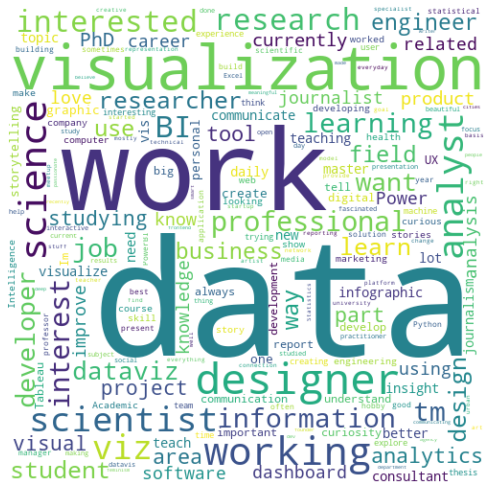

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#collocations 
wc = WordCloud(width=500, height=500, background_color="white", collocations=False).generate(str_int)

# display the generated image:
my_dpi = 72
plt.figure(figsize = (500/my_dpi, 500/my_dpi), dpi=my_dpi)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#plt.show()
plt.tight_layout()
#plt.savefig('Meetup_WC_interest.png', dpi=100)

### Common Words

In [28]:
# bag of words as a dictionary data type
bow = {}

# count the occurrences of each word and save it
for word in without_stopwords:
  bow[word] = without_stopwords.count(word)

# a sorted list of word-frequency tuples
words_frequency = sorted(bow.items(), key=lambda x: x[1], reverse=True)

print(words_frequency[0:100])

[('I', 671), ('data', 516), ('work', 214), ('visualization', 179), ('Data', 144), ('designer', 73), ('working', 59), ('viz', 52), ('scientist', 43), ('science', 42), ('interested', 42), ('tm', 42), ('analyst', 42), ('want', 37), ('job', 37), ('research', 36), ('Work', 36), ('interest', 36), ('BI', 35), ('visualizations', 34), ('learning', 33), ('researcher', 32), ('like', 32), ('field', 32), ('information', 32), ('professional', 31), ('learn', 31), ('developer', 30), ('use', 29), ('dataviz', 28), ('Science', 28), ('student', 28), ('area', 24), ('part', 24), ('design', 23), ('way', 22), ('engineer', 21), ('It', 21), ('studying', 20), ('business', 20), ('tools', 19), ('related', 19), ('journalist', 19), ('Designer', 19), ('PhD', 19), ('would', 18), ('Analyst', 18), ('visual', 18), ('know', 18), ('analysis', 17), ('knowledge', 17), ('currently', 17), ('Working', 17), ('software', 17), ('projects', 16), ('analytics', 16), ('Scientist', 16), ('Visualization', 15), ('using', 15), ('visualize

In [29]:
# dataframe from the word frequencies
df = pd.DataFrame(words_frequency, columns=['word', 'count'])

# we want to focus just on the top 20 words
df_top = df[:20]

# draw horizontal barchart 
alt.Chart(df_top).mark_bar().encode(
  x = 'count:Q',
  y = 'word:N'
)

alt.Chart(...)

### SECOND QUESTION 

In [70]:
word_file = "Meetup_learn_wc.txt"
text_learn = open(word_file).read()

In [73]:
text_learn[:500]

'\'Design process, design choices, tools\', \'The intensity and impact\', \'Relevance of different graphs in different situations\', "Currently I have been working as a data visualisation consultant To convey the right message through the right yet beautiful looking charts has always been my goal and that\'s what I want to learn.", \'A new approach or technique\', \'hah! almost everything. especially the animation and graphing aspects, I suppose.\', \'Everything! Different tools and data visualisation softwa'

In [74]:
words_learn = nltk.word_tokenize(text_learn)
words_learn[:10]

["'Design",
 'process',
 ',',
 'design',
 'choices',
 ',',
 'tools',
 "'",
 ',',
 "'The"]

In [36]:
onlywords_learn = [word for word in words if word.isalpha()]

onlywords_learn[0:20]

['process',
 'design',
 'choices',
 'tools',
 'intensity',
 'and',
 'impact',
 'of',
 'different',
 'graphs',
 'in',
 'different',
 'situations',
 'Currently',
 'I',
 'have',
 'been',
 'working',
 'as',
 'a']

In [42]:
from nltk.corpus import stopwords as stop

stopwords = stop.words("english")

# this is a special form called List Comprehensions
without_stopwords_learn = [word for word in onlywords_learn if word not in stopwords]

print(without_stopwords_learn[:50])

['process', 'design', 'choices', 'tools', 'intensity', 'impact', 'different', 'graphs', 'different', 'situations', 'Currently', 'I', 'working', 'data', 'visualisation', 'consultant', 'To', 'convey', 'right', 'message', 'right', 'yet', 'beautiful', 'looking', 'charts', 'always', 'goal', 'I', 'want', 'learn', 'A', 'new', 'approach', 'technique', 'almost', 'everything', 'especially', 'animation', 'graphing', 'aspects', 'I', 'suppose', 'Different', 'tools', 'data', 'visualisation', 'softwares', 'etc', 'advance', 'visualisation']


In [46]:
str_learn = " ".join(without_stopwords_learn)

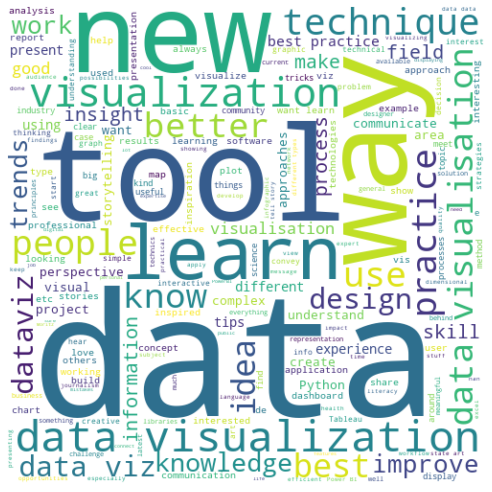

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500, height=500, background_color="white").generate(str_learn)

# display the generated image:
my_dpi = 72
plt.figure(figsize = (500/my_dpi, 500/my_dpi), dpi=my_dpi)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#plt.show()
plt.tight_layout()
plt.savefig('Meetup_WC_learn.png', dpi=100)

### Common Words

In [58]:
# bag of words as a dictionary data type
bow = {}

# count the occurrences of each word and save it
for word in without_stopwords_learn:
  bow[word] = without_stopwords_learn.count(word)

# a sorted list of word-frequency tuples
words_frequency_learn = sorted(bow.items(), key=lambda x: x[1], reverse=True)

print(words_frequency_learn[0:100])

[('data', 343), ('I', 186), ('tools', 107), ('visualization', 93), ('learn', 86), ('like', 76), ('new', 70), ('practices', 64), ('would', 62), ('best', 60), ('ways', 55), ('visualisation', 54), ('techniques', 50), ('people', 47), ('better', 46), ('viz', 44), ('know', 44), ('use', 42), ('ideas', 36), ('way', 35), ('knowledge', 33), ('visualizations', 32), ('design', 31), ('want', 31), ('dataviz', 29), ('improve', 29), ('get', 28), ('trends', 27), ('skills', 27), ('different', 26), ('make', 26), ('information', 26), ('process', 25), ('field', 24), ('insights', 24), ('Data', 23), ('good', 23), ('work', 22), ('using', 22), ('tips', 21), ('present', 20), ('communicate', 18), ('approaches', 17), ('understand', 17), ('create', 15), ('complex', 15), ('love', 15), ('interested', 15), ('projects', 14), ('show', 14), ('approach', 13), ('etc', 13), ('area', 13), ('visualisations', 13), ('learning', 13), ('see', 13), ('used', 13), ('de', 13), ('storytelling', 13), ('visualize', 12), ('stories', 12)

In [59]:
# dataframe from the word frequencies
df = pd.DataFrame(words_frequency_learn, columns=['word', 'count'])

# we want to focus just on the top 20 words
df_top = df[:20]

# draw horizontal barchart 
alt.Chart(df_top).mark_bar().encode(
  x = 'count:Q',
  y = 'word:N'
)

alt.Chart(...)

## Sources

1. <a href="https://towardsdatascience.com/tokenize-text-columns-into-sentences-in-pandas-2c08bc1ca790" target="_blank">Tokenize Text Columns Into Sentences in Pandas</a>

2. <a href="https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a" target="_blank">A Complete Exploratory Data Analysis and Visualization for Text Data</a>

3. <a href="https://www.nltk.org/" target="_blank">Natural Language Toolkit Documentation</a>